In [2]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import gensim.downloader as api
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from gensim.models.doc2vec import Doc2Vec


ModuleNotFoundError: No module named 'boto'

In [30]:
df = pd.read_csv('../data/final_okcupid.csv')

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()),
                              tags=[str(i)]) for i, _d in enumerate(df['essay0'])]

In [32]:
from gensim.models.doc2vec import Doc2Vec

max_epochs = 50
vec_size = 200
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("dv_200_cleaned.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
Model Saved


In [34]:
model= Doc2Vec.load("dv_200_cleaned.model")

## Section 2: Visualization

### Method 1: Using t-SNE

In [10]:
#Visualize TSNE with doc2vec

def doc2vec_tsne_plot(doc_model, ppx):
    tokens = []
    for i in range(len(doc_model.docvecs.vectors_docs)):
        tokens.append(doc_model.docvecs.vectors_docs[i])

    # Reduce 100 dimensional vectors down into 2-dimensional space so that we can see them
    tsne_model = TSNE(perplexity=ppx, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    X = [doc[0] for doc in new_values]
    y = [doc[1] for doc in new_values]
    return X, y, ppx

In [49]:
vec_model_200_ppx100_clean = doc2vec_tsne_plot(model,100)
vec_model_200_ppx10_clean= doc2vec_tsne_plot(model,10)
vec_model_200_ppx50_clean= doc2vec_tsne_plot(model,50)
vec_model_200_ppx30_clean= doc2vec_tsne_plot(model,30)

In [43]:
def plot_tsne_label(tup,df,labels):    
    """
    Takes in a tuple of labelled coordinates in pickle form, as well as a label
    Combine data into DataFrame, so that we plot it easily using Seaborn
    """
    df_plt = pd.DataFrame({'X':tup[0], 'y':tup[1], labels:df[labels]})
    plt.figure(figsize=(16, 16))
    sns.scatterplot(x="X", y="y", hue=labels, data=df_plt)
    plt.savefig('doc_scatter_pca_200_'+'ppx_'+str(tup[2])+'_'+labels+'_cleaned.png')
    return


In [39]:
def plot_tsne_nolabel(tup):    
    '''Takes in a tuple of labelled coordinates in pickle form, as well as a label
    Combine data into DataFrame, so that we plot it easily using Seaborn'''
    df = pd.DataFrame({'X':tup[0], 'y':tup[1]})
    plt.figure(figsize=(16, 16))
    sns.scatterplot(x="X", y="y", data=df)
    plt.savefig('doc_scatter_pca_200_'+'ppx_'+str(tup[2])+"_cleaned"+'.png')
    return

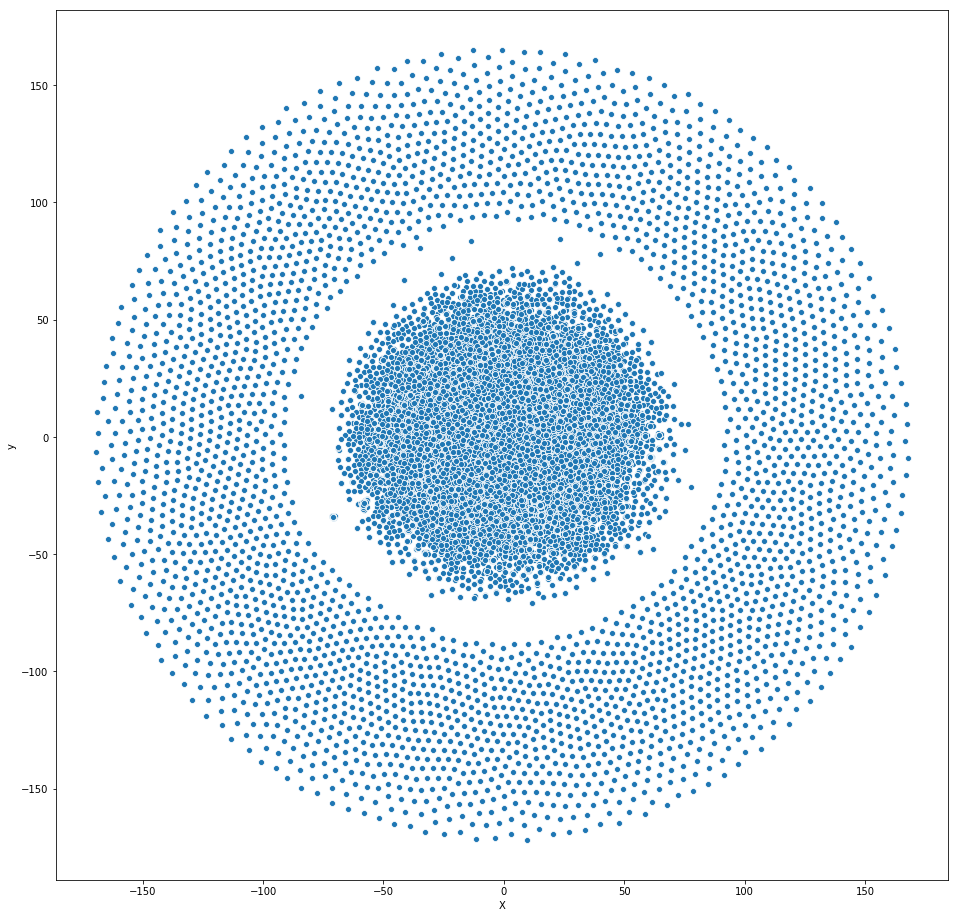

In [40]:
plot_tsne_nolabel(vec_model_200_ppx10_clean)

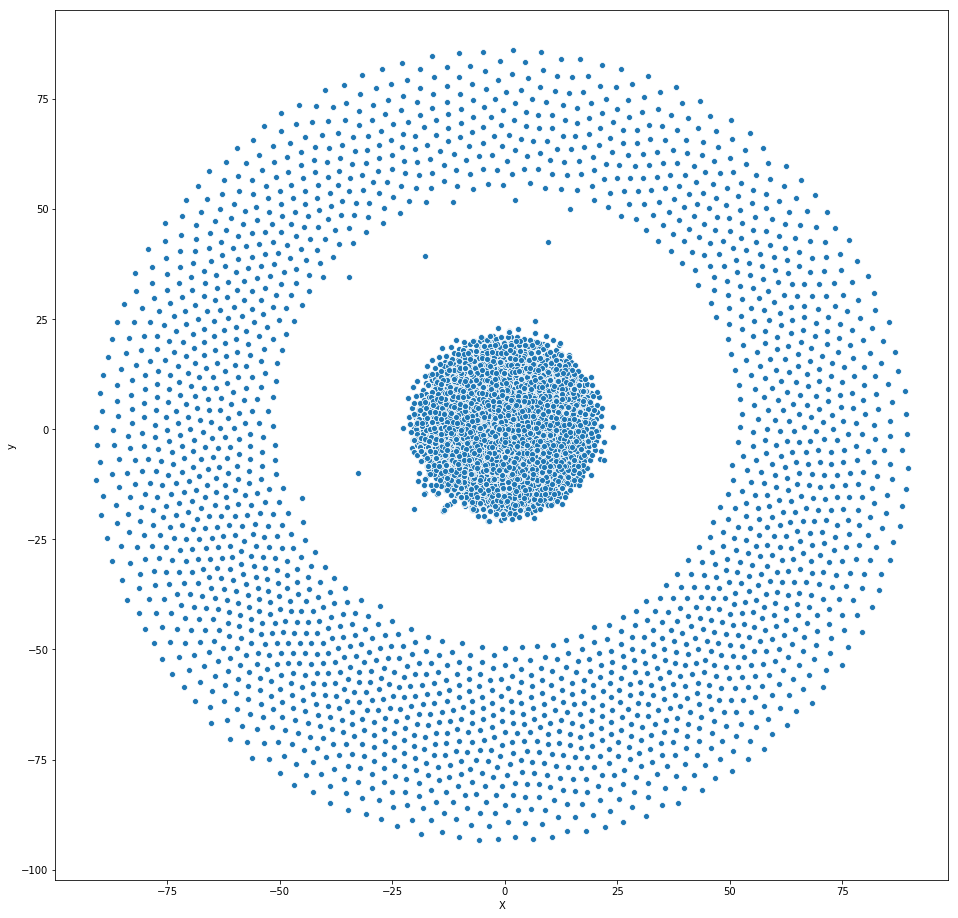

In [46]:
plot_tsne_nolabel(vec_model_200_ppx30_clean)

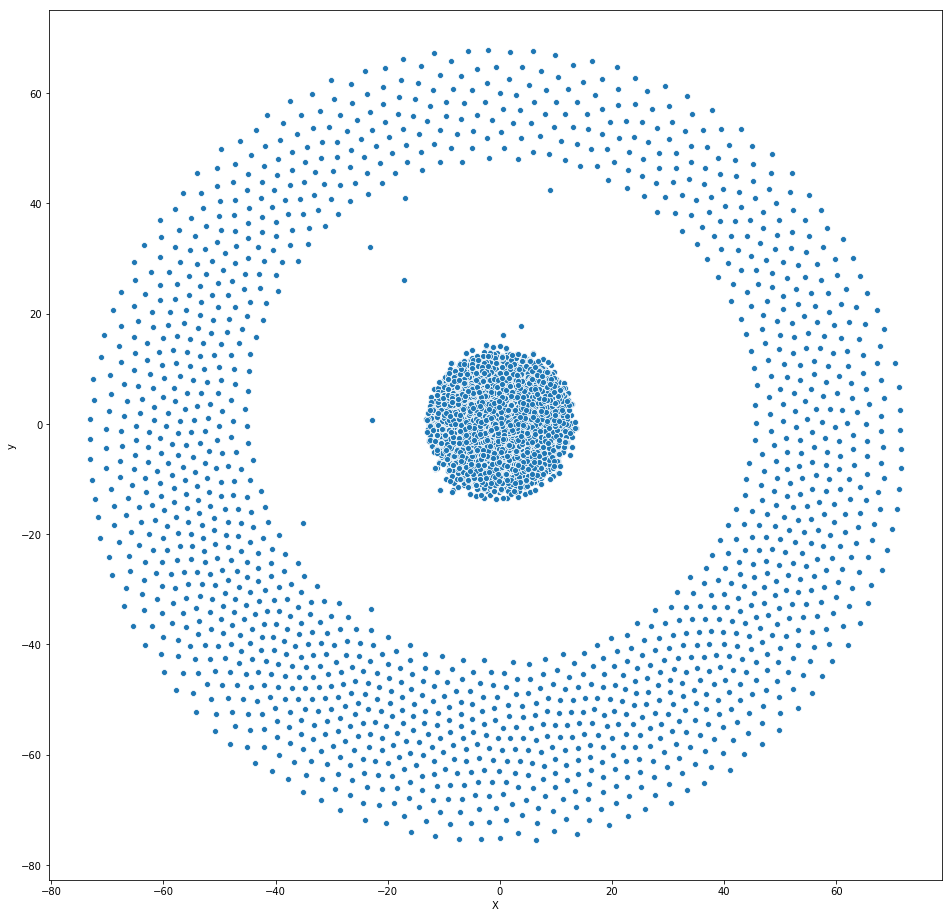

In [51]:
plot_tsne_nolabel(vec_model_200_ppx50_clean)

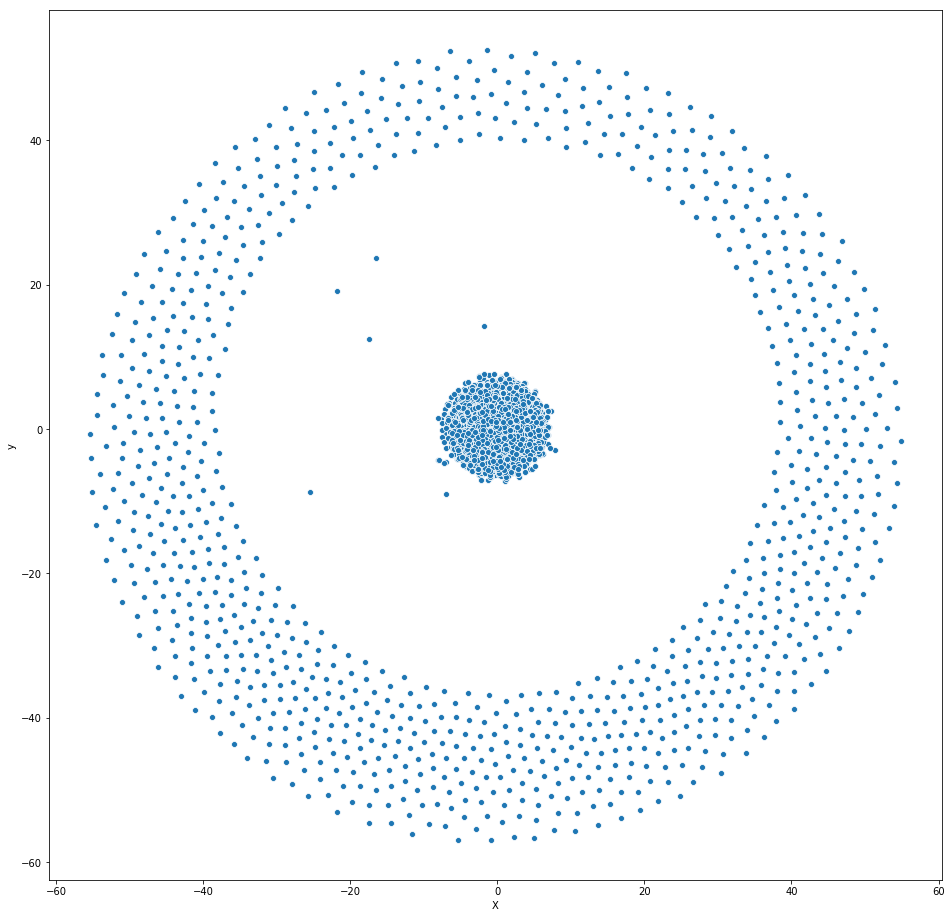

In [50]:
plot_tsne_nolabel(vec_model_200_ppx100_clean)

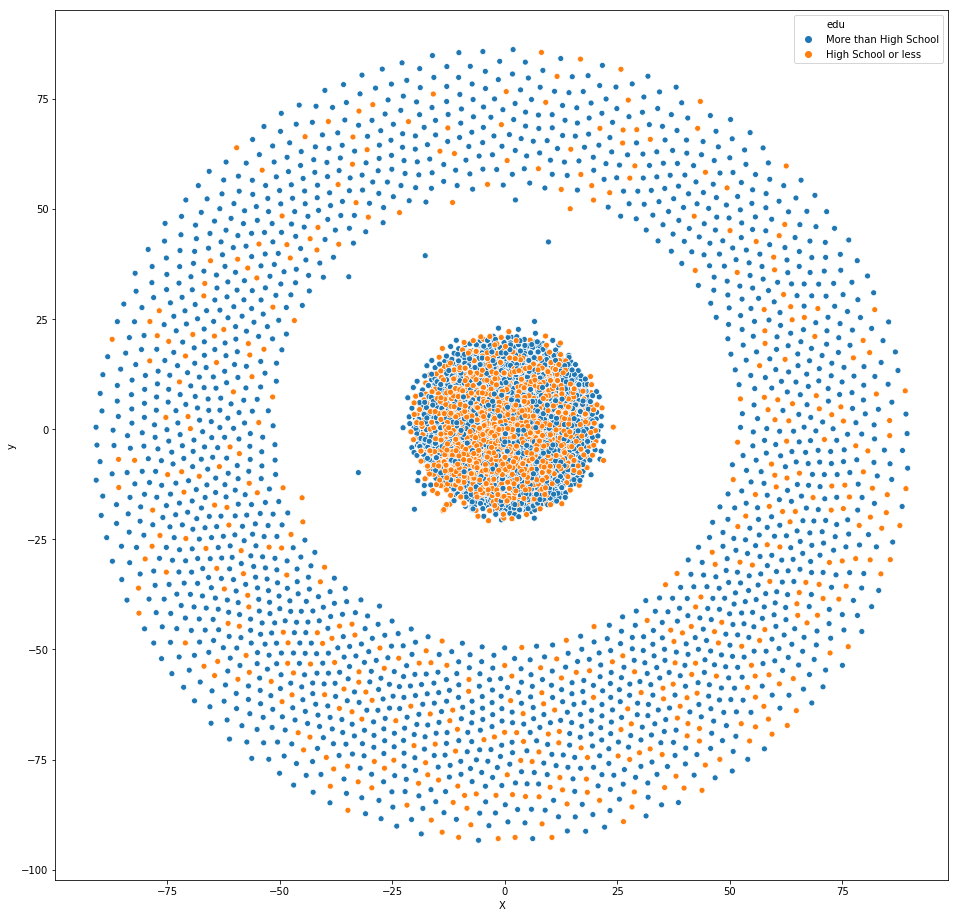

In [47]:
plot_tsne_label(vec_model_200_ppx30_clean,df,'edu')

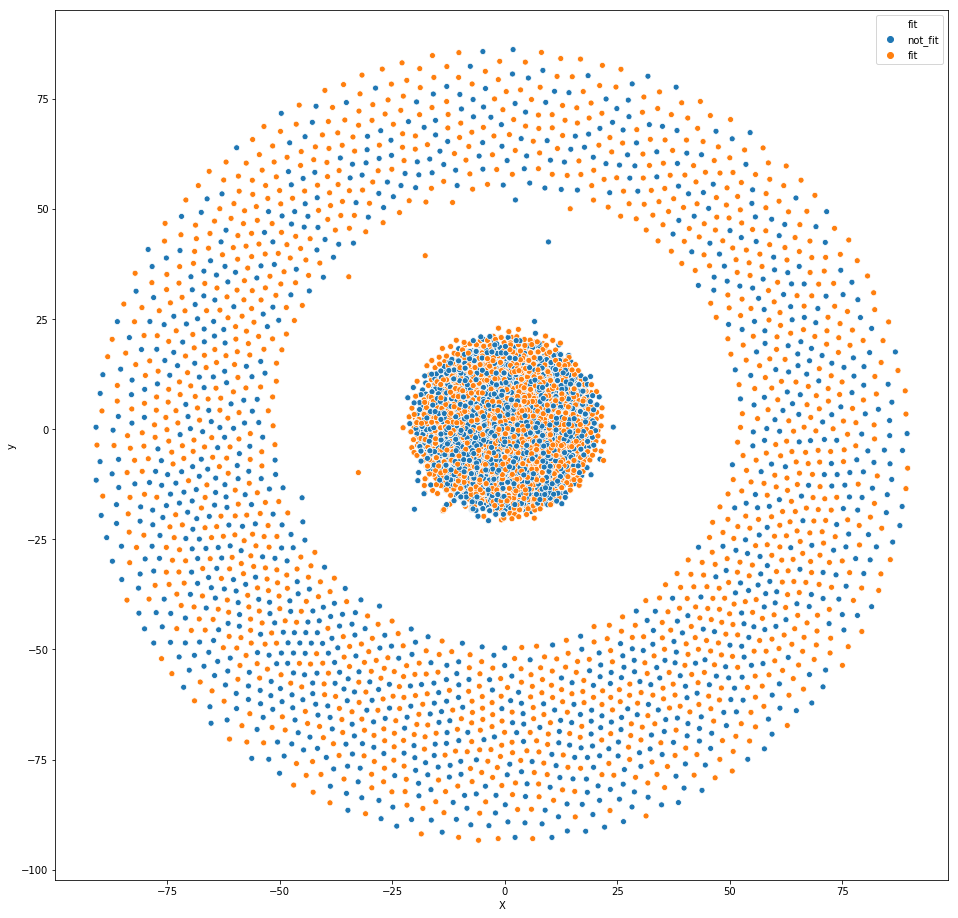

In [52]:
plot_tsne_label(vec_model_200_ppx30_clean,df,'fit')

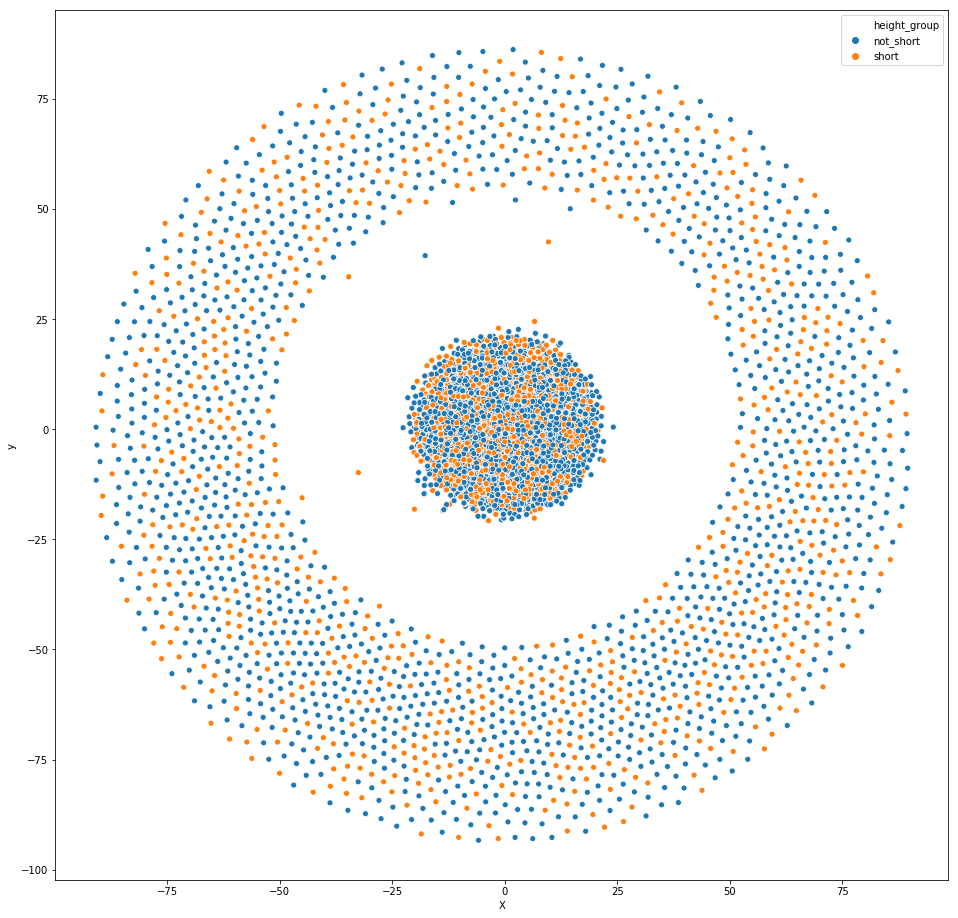

In [53]:
plot_tsne_label(vec_model_200_ppx30_clean,df,'height_group')

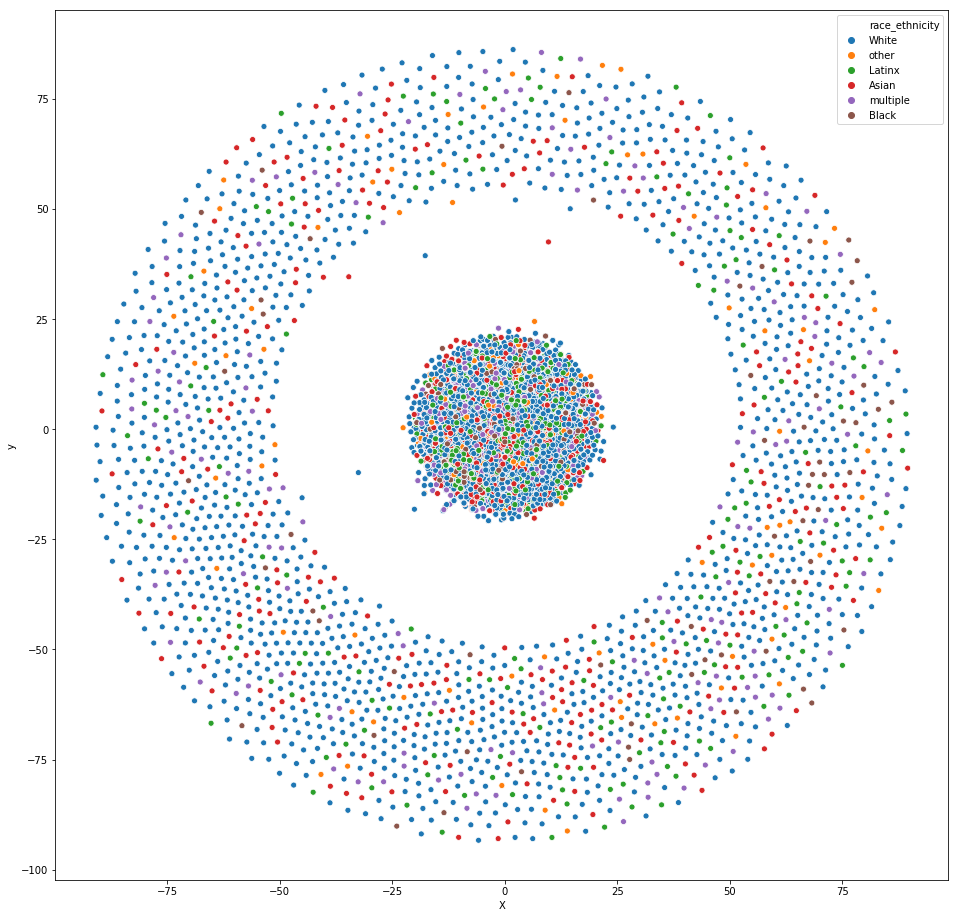

In [55]:
plot_tsne_label(vec_model_200_ppx30_clean,df,'race_ethnicity')

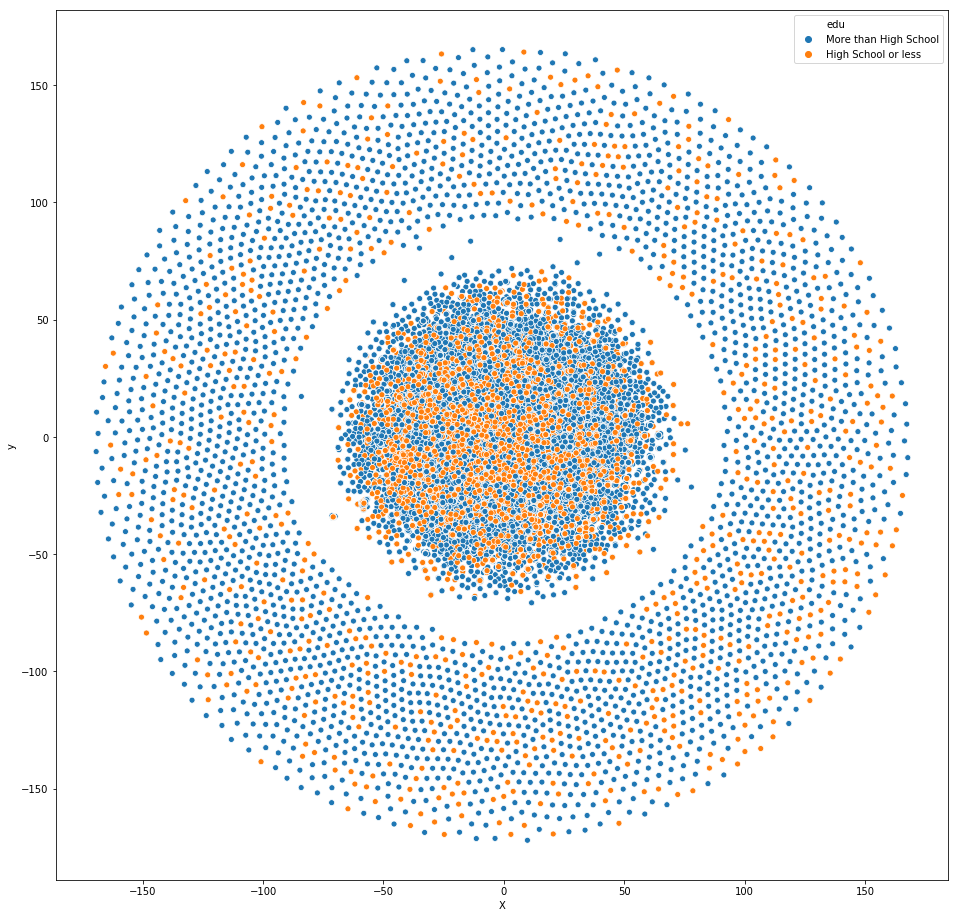

In [54]:
plot_tsne_label(vec_model_200_ppx10_clean,df,'edu')

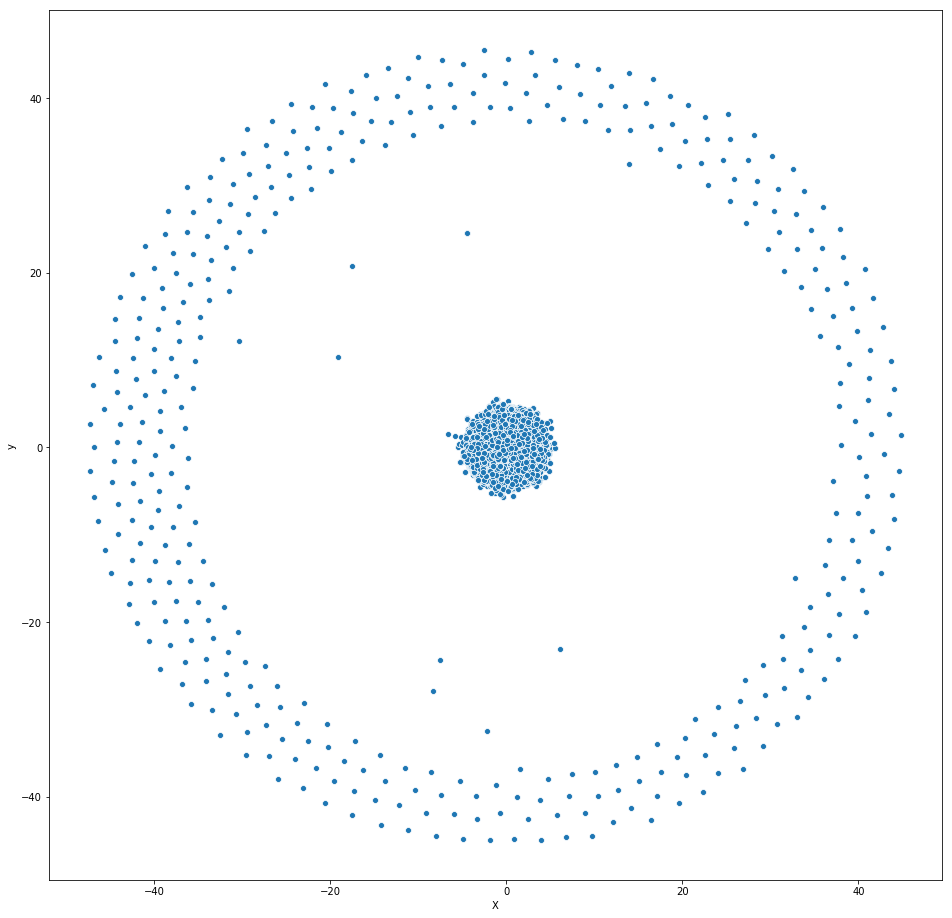

In [20]:
plot_tsne_nolabel(vec_model_200_ppx100)

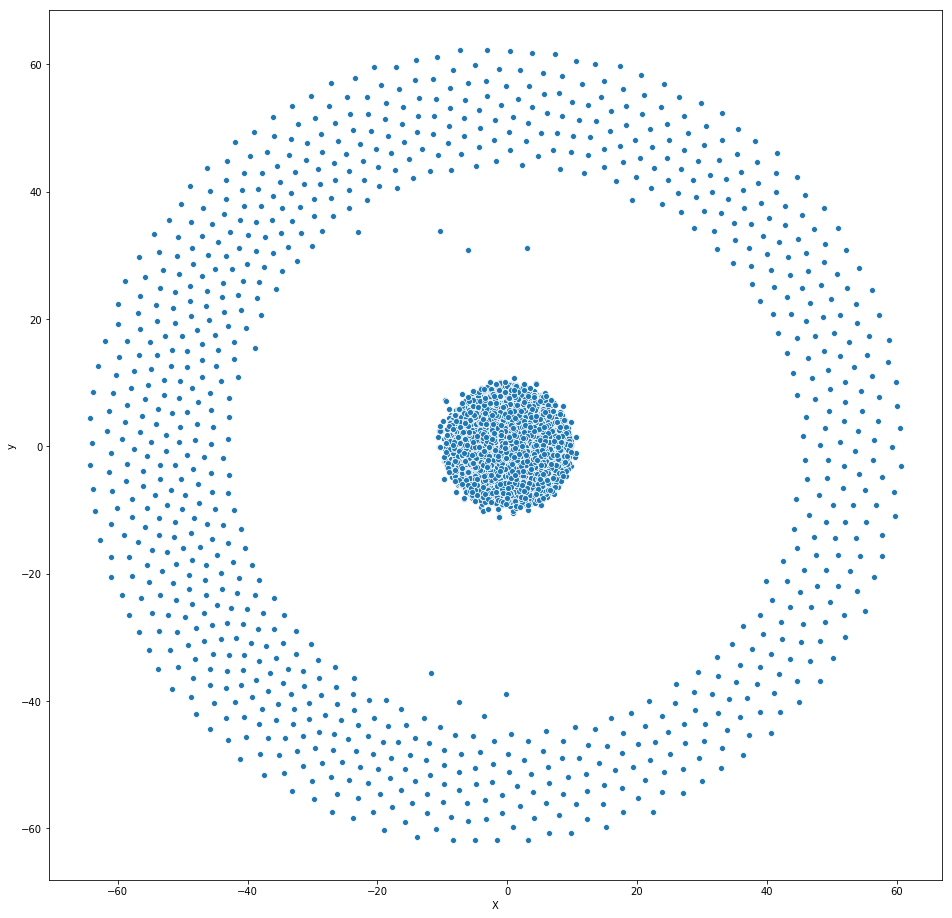

In [22]:
plot_tsne_nolabel(vec_model_200_ppx50)

### Using K-Means

In [14]:
# This Section Explores K-Means Clustering for the High Dimensional Vectors
X = model.docvecs.vectors_docs
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

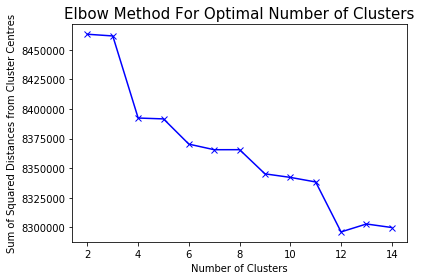

In [15]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances from Cluster Centres')
plt.title('Elbow Method For Optimal Number of Clusters', fontsize=15)
plt.savefig('Elbow_Plot_300.png', bbox_inches='tight')


In [ ]:
num_clusters = 4
num_seeds = 4
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404'
}
pca_num_components = 2
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

X = model.docvecs.vectors_docs
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
labels = clustering_model.fit_predict(reduced_data)

In [24]:
#Demographic variable of interest
target= 'education'

In [37]:
pca.explained_variance_ratio_

array([0.01264085, 0.01122662], dtype=float32)

In [36]:
#PCA- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca_num_components = 2
X = model.docvecs.vectors_docs
pca = PCA(n_components=pca_num_components)
reduced_data= pca.fit_transform(X)
#Approach 1- Construct a DataFrame to Construct the Results Plot
principalDf = pd.DataFrame(data = reduced_data,
                           columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)
#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#colors = ['r', 'g', 'b']


KeyError: "['Iris-setosa'] not in index"

KeyError: 'Iris-setosa'

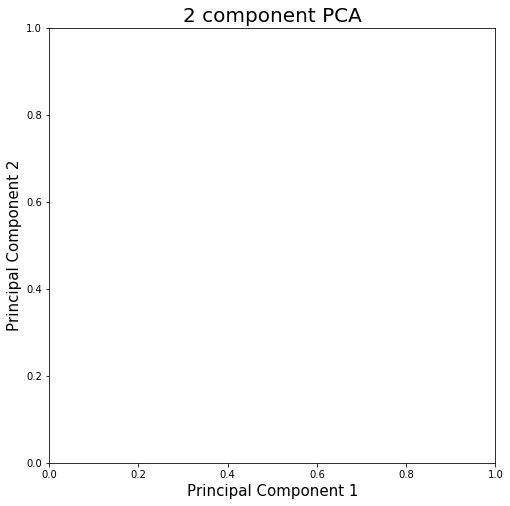

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#ax.legend(targets)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[target] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.grid()

In [ ]:
from sklearn.manifold import TSNE
# Creating and fitting the tsne model to the document embeddings
tsne_model = TSNE(early_exaggeration=4,
                  n_components=2,
                  verbose=1,
                  random_state=2018,
                  n_iter=300)
tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors_docs)

In [ ]:
plt.scatter(tsne_d2v [:, 0], tsne_d2v [:, 1])
plt.show()
plt.savefig('TSNE_blob.png', bbox_inches='tight')

In [ ]:
output = pd.DataFrame(model.docvecs.vectors_docs)
output.to_csv("../Data/doc2vec_results.csv")
output